## ******************************LIBRARY IMPORTAION***************

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from tensorflow.keras.models import Sequential,Model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense,Flatten,Dropout,SimpleRNN,LSTM,Input,Reshape
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from miceforest import ImputationKernel
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

## ******DATA SET IMPORTATION AND PREPROCESSING FOR FIRST DATASET******

In [2]:
df_als=pd.read_csv('data/train2-alsfrs.csv')
df_sensor=pd.read_csv('data/train2-sensor.csv')
df_static=pd.read_csv('data/train2-static.csv')

In [3]:
df_als= df_als.rename(columns={'patient_id':'id','days_from_diagnosis': 'days'})
df_sensor = df_sensor.rename(columns={'patient_id':'id','measure_days_from_diagnosis': 'days'})
df_static = df_static.rename(columns={'patient_id':'id'})
df_als=df_als.drop('source',axis=1)
df_sensor=df_sensor.dropna()
column_prefixes = {}
for col in df_sensor.columns:
    prefix = col.split('_')[0]
    if prefix not in column_prefixes:
        column_prefixes[prefix] = []
    column_prefixes[prefix].append(col)

# Extract lists of columns based on prefixes
beat_columns = column_prefixes.get('beat', [])
heartrate_columns = column_prefixes.get('heart', [])
respiration_columns = column_prefixes.get('respiration', [])
spo2_columns = column_prefixes.get('spo2', [])
steps_columns = column_prefixes.get('steps', [])

# Print the results
print("beat columns:", beat_columns)
print("heartrate columns:", heartrate_columns)
print("respiration columns:", respiration_columns)
print("spo2 columns:", spo2_columns)
print("steps columns:", steps_columns)

# Compute aggregated features for beat_to_beat columns
df_sensor['beat_to_beat_mean'] = df_sensor[beat_columns].mean(axis=1)
df_sensor['beat_to_beat_median'] = df_sensor[beat_columns].median(axis=1)
df_sensor['beat_to_beat_std'] = df_sensor[beat_columns].std(axis=1)
df_sensor['beat_to_beat_min'] = df_sensor[beat_columns].min(axis=1)
df_sensor['beat_to_beat_max'] = df_sensor[beat_columns].max(axis=1)

# Compute aggregated features for heart_rate columns
df_sensor['heart_mean'] = df_sensor[heartrate_columns].mean(axis=1)
df_sensor['heart_median'] = df_sensor[heartrate_columns].median(axis=1)
df_sensor['heart_std'] = df_sensor[heartrate_columns].std(axis=1)
df_sensor['heart_min'] = df_sensor[heartrate_columns].min(axis=1)
df_sensor['heart_max'] = df_sensor[heartrate_columns].max(axis=1)

# Compute aggregated features for respiration columns
df_sensor['respiration_mean'] = df_sensor[respiration_columns].mean(axis=1)
df_sensor['respiration_median'] = df_sensor[respiration_columns].median(axis=1)
df_sensor['respiration_std'] = df_sensor[respiration_columns].std(axis=1)
df_sensor['respiration_min'] = df_sensor[respiration_columns].min(axis=1)
df_sensor['respiration_max'] = df_sensor[respiration_columns].max(axis=1)

# Compute aggregated features for spo2 columns
df_sensor['spo2_mean'] = df_sensor[spo2_columns].mean(axis=1)
df_sensor['spo2_median'] = df_sensor[spo2_columns].median(axis=1)
df_sensor['spo2_std'] = df_sensor[spo2_columns].std(axis=1)
df_sensor['spo2_min'] = df_sensor[spo2_columns].min(axis=1)
df_sensor['spo2_max'] = df_sensor[spo2_columns].max(axis=1)

# Compute aggregated features for steps columns
df_sensor['steps_mean'] = df_sensor[steps_columns].mean(axis=1)
df_sensor['steps_median'] = df_sensor[steps_columns].median(axis=1)
df_sensor['steps_std'] = df_sensor[steps_columns].std(axis=1)
df_sensor['steps_min'] = df_sensor[steps_columns].min(axis=1)
df_sensor['steps_max'] = df_sensor[steps_columns].max(axis=1)

df_sensor = df_sensor.drop(columns=beat_columns + heartrate_columns + respiration_columns + spo2_columns+ steps_columns)

merged_df = pd.merge( df_static,df_als, on=['id'], how='outer')
df=merged_df
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df.shape
df1=df.drop([187,188],axis=0)
df1
df=df1
first_=df.iloc[:,:2]
X=df.iloc[:,2:7]
y=df.iloc[:,7:]
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_normalized[np.isnan(X_normalized)] = 0
input_layer = Input(shape=(X_normalized.shape[1],))
encoded = Dense(2, activation='relu')(input_layer)
decoded = Dense(X_normalized.shape[1], activation='linear')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_normalized, X_normalized,epochs=100,batch_size=1)
imputed_data = autoencoder.predict(X_normalized)
imputed_data = scaler.inverse_transform(imputed_data)
imputed_df = pd.DataFrame(imputed_data, columns=X.columns)

beat columns: ['beat_to_beat_AI', 'beat_to_beat_C2a', 'beat_to_beat_C2d', 'beat_to_beat_Ca', 'beat_to_beat_Cd', 'beat_to_beat_GI', 'beat_to_beat_HTI', 'beat_to_beat_IALS', 'beat_to_beat_PAS', 'beat_to_beat_PI', 'beat_to_beat_PIP', 'beat_to_beat_PSS', 'beat_to_beat_SD1a', 'beat_to_beat_SD1d', 'beat_to_beat_SDNNa', 'beat_to_beat_SDNNd', 'beat_to_beat_SI', 'beat_to_beat_csi', 'beat_to_beat_csi_modified', 'beat_to_beat_cvi', 'beat_to_beat_cvsd', 'beat_to_beat_hcvNN', 'beat_to_beat_iqrNN', 'beat_to_beat_madNN', 'beat_to_beat_meanNN', 'beat_to_beat_medianNN', 'beat_to_beat_pNN20', 'beat_to_beat_pNN50', 'beat_to_beat_rmssd', 'beat_to_beat_sd1', 'beat_to_beat_sd1sd2', 'beat_to_beat_sd2', 'beat_to_beat_sdNN', 'beat_to_beat_sdNNI1', 'beat_to_beat_sdNNI2', 'beat_to_beat_sdNNI5', 'beat_to_beat_sdaNN1', 'beat_to_beat_sdaNN2', 'beat_to_beat_sdaNN5', 'beat_to_beat_sdsd']
heartrate columns: ['heart_rate_baseline', 'heart_rate_linear_trend', 'heart_rate_max_time', 'heart_rate_maximum', 'heart_rate_mean

In [4]:
df = pd.concat([first_,imputed_df, y], axis=1)
merged_df = pd.merge( df_sensor,df, on=['id','days'], how='outer')
merged=merged_df.dropna(subset='Q1')
merged
x_data=merged.iloc[:,2:98]
mk=ImputationKernel(data=x_data,save_all_iterations=True,random_state=0)
mk.mice(2)
m_data=mk.complete_data()
m_data.head()

,active_calories,basal_calories,total_calories,total_steps,beat_to_beat_mean,beat_to_beat_median,beat_to_beat_std,beat_to_beat_min,beat_to_beat_max,heart_mean,...,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
47,8.0,1631.0,1639.25,142.0,241.248120,6.701384,1245.108357,0.0,7875.732781,9225.241183,...,4.0,2.0,1.0,1.0,3.0,1.0,0.0,1.0,3.0,1.0
123,248.0,1766.0,2014.25,3162.0,362.723268,9.921813,1950.042947,0.0,12359.932766,9378.302638,...,4.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
194,393.0,1766.0,2159.25,3685.0,246.255494,9.050092,1267.505930,0.0,8029.786680,4429.200499,...,4.0,3.0,3.0,3.0,4.0,3.0,1.0,4.0,4.0,4.0
285,69.0,1711.0,1780.25,104.0,216.344360,6.316873,1116.862835,0.0,7065.715583,12055.349844,...,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0
408,29.0,1711.0,1740.25,20.0,176.890448,5.613089,884.702444,0.0,5586.499504,3684.513184,...,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0


In [5]:
df = pd.concat([first_,imputed_df, y], axis=1)
merged_df = pd.merge( df_sensor,df, on=['id','days'], how='outer')
merged=merged_df.dropna(subset='Q1')
merged
x_data=merged.iloc[:,2:98]
mk=ImputationKernel(data=x_data,save_all_iterations=True,random_state=0)
mk.mice(2)
m_data=mk.complete_data()
m_data.head()
first_=merged.iloc[:,:2]
y=merged.iloc[:,98:]
df = pd.concat([first_,m_data, y], axis=1)

first_df=df
first_df

,id,days,active_calories,basal_calories,total_calories,total_steps,beat_to_beat_mean,beat_to_beat_median,beat_to_beat_std,beat_to_beat_min,...,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
47,fd228ba0,993,8.0,1631.0,1639.25,142.0,241.248120,6.701384,1245.108357,0.0,...,4.0,2.0,1.0,1.0,3.0,1.0,0.0,1.0,3.0,1.0
123,c53a1583,87,248.0,1766.0,2014.25,3162.0,362.723268,9.921813,1950.042947,0.0,...,4.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
194,c53a1583,266,393.0,1766.0,2159.25,3685.0,246.255494,9.050092,1267.505930,0.0,...,4.0,3.0,3.0,3.0,4.0,3.0,1.0,4.0,4.0,4.0
285,fbeebbbb,775,69.0,1711.0,1780.25,104.0,216.344360,6.316873,1116.862835,0.0,...,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0
408,fbeebbbb,929,29.0,1711.0,1740.25,20.0,176.890448,5.613089,884.702444,0.0,...,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,9c810836,8663,338.0,1726.0,1975.25,5370.0,380.049833,11.201272,2151.252860,0.0,...,4.0,3.0,3.0,3.0,4.0,3.0,1.0,4.0,4.0,4.0
7034,9c810836,8782,158.0,1701.0,1827.25,681.0,571.470169,10.393994,3248.539833,0.0,...,4.0,3.0,3.0,3.0,4.0,4.0,1.0,4.0,4.0,4.0
7035,df4c99f5,8658,202.0,1631.0,1836.25,2070.0,719.291173,9.507796,4153.055112,0.0,...,4.0,3.0,1.0,1.0,1.0,2.0,0.0,4.0,4.0,4.0
7036,9cb5cd37,97,250.0,1701.0,1814.25,1830.0,435.904766,10.354485,2380.131002,0.0,...,4.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0


## ******DATA SET IMPORTATION AND PREPROCESSING FOR SECOND DATASET******

In [6]:
df_als=pd.read_csv('data/train-alsfrs.csv')
df_sensor=pd.read_csv('data/train-sensor.csv')
df_static=pd.read_csv('data/train-static.csv')

In [7]:
df_als= df_als.rename(columns={'patient_id':'id','days_from_diagnosis': 'days'})
df_sensor = df_sensor.rename(columns={'patient_id':'id','measure_days_from_diagnosis': 'days'})
df_static = df_static.rename(columns={'patient_id':'id'})


In [8]:
df_als
df_als=df_als.drop('source',axis=1)
df_als

,id,days,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,fd228ba0,829,3,4,4,3,1,2,3,2,1,1,0,2
1,fd228ba0,863,3,4,4,3,1,2,3,2,1,1,0,2
2,fd228ba0,941,3,4,4,2,1,2,3,1,0,1,0,2
3,fd228ba0,974,3,4,4,3,1,2,3,1,0,1,0,2
4,fd228ba0,1007,3,4,4,2,1,1,3,1,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,5f4c8750,1203,3,4,4,3,4,3,3,2,2,2,4,4
297,c0d49276,103,4,4,4,4,4,4,4,2,3,4,4,4
298,c0d49276,135,4,4,4,4,4,2,3,2,1,4,4,4
299,c0d49276,167,4,4,4,4,4,2,3,2,1,4,4,4


In [9]:
df_sensor

,id,days,active_calories,basal_calories,beat_to_beat_AI,beat_to_beat_C2a,beat_to_beat_C2d,beat_to_beat_Ca,beat_to_beat_Cd,beat_to_beat_GI,...,spo2_P,spo2_POD,spo2_RG,spo2_SD,spo2_ZC,steps_12_am-6_am,steps_12_pm-6_pm,steps_6_am-12_pm,total_calories,total_steps
0,fd228ba0,800,7.0,1631.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,23.0,50.0,1638.25,82.0
1,fd228ba0,801,6.0,1631.0,NaN,NaN,NaN,NaN,NaN,NaN,...,81.666667,0.269737,15.666667,2.943160,27.0,26.0,0.0,121.0,1637.25,147.0
2,fd228ba0,802,NaN,NaN,49.999707,0.492208,0.507792,0.492233,0.507767,50.000000,...,84.333333,0.405738,13.666667,3.055109,8.0,NaN,NaN,NaN,NaN,NaN
3,fd228ba0,803,34.0,1631.0,49.726549,0.485366,0.514634,0.485469,0.514531,49.713790,...,83.666667,0.446494,16.166667,3.814763,18.0,0.0,13.0,67.0,1665.25,121.0
4,fd228ba0,804,7.0,1631.0,50.571503,0.490403,0.509597,0.490584,0.509416,50.648942,...,84.753333,0.000000,7.333333,2.338218,1.0,28.0,0.0,111.0,1638.25,139.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13941,c0d49276,103,84.0,1731.0,49.834021,0.495811,0.504189,0.495786,0.504214,49.854366,...,84.000000,0.592255,16.000000,2.784654,44.0,0.0,86.0,138.0,1815.25,264.0
13942,c0d49276,104,18.0,1731.0,50.179489,0.517709,0.482291,0.517311,0.482689,50.157936,...,82.526667,0.225806,17.333333,4.093733,6.0,0.0,11.0,82.0,1749.25,125.0
13943,c0d49276,105,153.0,1731.0,49.533121,0.504001,0.495999,0.504016,0.495984,49.542399,...,86.000000,0.327731,13.000000,2.819238,14.0,0.0,103.0,117.0,1884.25,249.0
13944,c0d49276,106,98.0,1731.0,50.128646,0.495741,0.504259,0.495807,0.504193,50.147842,...,85.666667,0.297376,17.000000,3.148154,21.0,0.0,280.0,68.0,1829.25,414.0


# FEATURE ENGINEERING

In [10]:
column_prefixes = {}
for col in df_sensor.columns:
    prefix = col.split('_')[0]
    if prefix not in column_prefixes:
        column_prefixes[prefix] = []
    column_prefixes[prefix].append(col)

# Extract lists of columns based on prefixes
beat_columns = column_prefixes.get('beat', [])
heartrate_columns = column_prefixes.get('heart', [])
respiration_columns = column_prefixes.get('respiration', [])
spo2_columns = column_prefixes.get('spo2', [])
steps_columns = column_prefixes.get('steps', [])

# Print the results
print("beat columns:", beat_columns)
print("heartrate columns:", heartrate_columns)
print("respiration columns:", respiration_columns)
print("spo2 columns:", spo2_columns)
print("steps columns:", steps_columns)


beat columns: ['beat_to_beat_AI', 'beat_to_beat_C2a', 'beat_to_beat_C2d', 'beat_to_beat_Ca', 'beat_to_beat_Cd', 'beat_to_beat_GI', 'beat_to_beat_HTI', 'beat_to_beat_IALS', 'beat_to_beat_PAS', 'beat_to_beat_PI', 'beat_to_beat_PIP', 'beat_to_beat_PSS', 'beat_to_beat_SD1a', 'beat_to_beat_SD1d', 'beat_to_beat_SDNNa', 'beat_to_beat_SDNNd', 'beat_to_beat_SI', 'beat_to_beat_csi', 'beat_to_beat_csi_modified', 'beat_to_beat_cvi', 'beat_to_beat_cvsd', 'beat_to_beat_hcvNN', 'beat_to_beat_iqrNN', 'beat_to_beat_madNN', 'beat_to_beat_meanNN', 'beat_to_beat_medianNN', 'beat_to_beat_pNN20', 'beat_to_beat_pNN50', 'beat_to_beat_rmssd', 'beat_to_beat_sd1', 'beat_to_beat_sd1sd2', 'beat_to_beat_sd2', 'beat_to_beat_sdNN', 'beat_to_beat_sdNNI1', 'beat_to_beat_sdNNI2', 'beat_to_beat_sdNNI5', 'beat_to_beat_sdaNN1', 'beat_to_beat_sdaNN2', 'beat_to_beat_sdaNN5', 'beat_to_beat_sdsd']
heartrate columns: ['heart_rate_baseline', 'heart_rate_linear_trend', 'heart_rate_max_time', 'heart_rate_maximum', 'heart_rate_mean

In [11]:
# Compute aggregated features for beat_to_beat columns
df_sensor['beat_to_beat_mean'] = df_sensor[beat_columns].mean(axis=1)
df_sensor['beat_to_beat_median'] = df_sensor[beat_columns].median(axis=1)
df_sensor['beat_to_beat_std'] = df_sensor[beat_columns].std(axis=1)
df_sensor['beat_to_beat_min'] = df_sensor[beat_columns].min(axis=1)
df_sensor['beat_to_beat_max'] = df_sensor[beat_columns].max(axis=1)

# Compute aggregated features for heart_rate columns
df_sensor['heart_mean'] = df_sensor[heartrate_columns].mean(axis=1)
df_sensor['heart_median'] = df_sensor[heartrate_columns].median(axis=1)
df_sensor['heart_std'] = df_sensor[heartrate_columns].std(axis=1)
df_sensor['heart_min'] = df_sensor[heartrate_columns].min(axis=1)
df_sensor['heart_max'] = df_sensor[heartrate_columns].max(axis=1)

# Compute aggregated features for respiration columns
df_sensor['respiration_mean'] = df_sensor[respiration_columns].mean(axis=1)
df_sensor['respiration_median'] = df_sensor[respiration_columns].median(axis=1)
df_sensor['respiration_std'] = df_sensor[respiration_columns].std(axis=1)
df_sensor['respiration_min'] = df_sensor[respiration_columns].min(axis=1)
df_sensor['respiration_max'] = df_sensor[respiration_columns].max(axis=1)

# Compute aggregated features for spo2 columns
df_sensor['spo2_mean'] = df_sensor[spo2_columns].mean(axis=1)
df_sensor['spo2_median'] = df_sensor[spo2_columns].median(axis=1)
df_sensor['spo2_std'] = df_sensor[spo2_columns].std(axis=1)
df_sensor['spo2_min'] = df_sensor[spo2_columns].min(axis=1)
df_sensor['spo2_max'] = df_sensor[spo2_columns].max(axis=1)

# Compute aggregated features for steps columns
df_sensor['steps_mean'] = df_sensor[steps_columns].mean(axis=1)
df_sensor['steps_median'] = df_sensor[steps_columns].median(axis=1)
df_sensor['steps_std'] = df_sensor[steps_columns].std(axis=1)
df_sensor['steps_min'] = df_sensor[steps_columns].min(axis=1)
df_sensor['steps_max'] = df_sensor[steps_columns].max(axis=1)

df_sensor = df_sensor.drop(columns=beat_columns + heartrate_columns + respiration_columns + spo2_columns+ steps_columns)

In [12]:
df_sensor.duplicated().sum()

0

## ***************DATA PREPROCESSING AND EXPLORATION***************

In [13]:
df_sensor=df_sensor.dropna()
df_sensor

,id,days,active_calories,basal_calories,total_calories,total_steps,beat_to_beat_mean,beat_to_beat_median,beat_to_beat_std,beat_to_beat_min,...,spo2_mean,spo2_median,spo2_std,spo2_min,spo2_max,steps_mean,steps_median,steps_std,steps_min,steps_max
3,fd228ba0,803,34.0,1631.0,1665.25,121.0,387.236444,9.511131,2104.086413,0.0,...,38.791548,18.000000,40.348907,0.446494,106.273063,26.666667,13.0,35.529331,0.0,67.0
4,fd228ba0,804,7.0,1631.0,1638.25,139.0,211.824702,8.298575,1068.232596,0.0,...,29.681936,1.403509,41.488680,0.000000,89.000000,46.333333,28.0,57.726366,0.0,111.0
24,fd228ba0,829,31.0,1631.0,1662.25,40.0,244.859065,7.945868,1267.887806,0.0,...,35.250417,17.551963,37.723110,0.364198,91.000000,13.333333,11.0,14.640128,0.0,29.0
25,fd228ba0,830,70.0,1631.0,1701.25,194.0,703.886075,6.187262,4028.033185,0.0,...,33.842627,8.000000,40.197432,0.000000,100.000000,16.666667,9.0,21.548395,0.0,41.0
27,fd228ba0,832,110.0,1631.0,1741.25,255.0,260.750258,8.972553,1357.323064,0.0,...,34.213140,11.666667,39.283883,0.411429,94.285714,76.000000,100.0,67.290415,0.0,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13940,c0d49276,102,210.0,1731.0,1941.25,609.0,224.584201,8.070300,1158.222222,0.0,...,27.891636,7.072692,39.629870,0.050420,93.117503,176.666667,34.0,277.072794,0.0,496.0
13941,c0d49276,103,84.0,1731.0,1815.25,264.0,283.459752,9.066580,1489.541509,0.0,...,34.973955,16.513761,36.385334,0.592255,91.666667,74.666667,86.0,69.694572,0.0,138.0
13942,c0d49276,104,18.0,1731.0,1749.25,125.0,230.832608,7.787738,1186.908852,0.0,...,30.913357,8.468468,37.684545,0.225806,94.666667,31.000000,11.0,44.508426,0.0,82.0
13943,c0d49276,105,153.0,1731.0,1884.25,249.0,368.584738,7.233637,2022.348792,0.0,...,31.396300,14.000000,37.788885,0.327731,94.000000,73.333333,103.0,63.893140,0.0,117.0


In [14]:
df_static

,id,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi
0,fd228ba0,M,2.002740,63,44.0,60.0,21.513859
1,c53a1583,M,0.000000,38,82.0,86.0,26.543210
2,fbeebbbb,M,21.180822,48,49.0,64.0,21.138856
3,0615d2f8,F,1.002740,67,73.0,66.0,27.120316
4,892d81f6,F,2.416438,49,100.0,70.0,28.040378
5,9d0b55d0,M,0.410959,28,84.0,85.0,28.400548
6,025f1df9,M,0.328767,58,96.0,79.0,27.660096
7,88b5b1aa,M,0.498630,58,94.0,69.0,24.447279
8,72c46573,M,0.252055,53,90.0,69.0,23.875433
9,527bc702,M,0.915068,64,95.0,77.0,26.027582


In [15]:
merged_df = pd.merge( df_static,df_als, on=['id'], how='outer')

## LABEL ENCODING CATEGORICAL DATA

In [16]:
df=merged_df
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df.shape

(302, 20)

In [17]:
df.columns.get_loc('Q1')

8

## Removing inappropriate Gender

In [18]:
df

,id,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi,days,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,829.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
1,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,863.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
2,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,941.0,3.0,4.0,4.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
3,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,974.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
4,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,1007.0,3.0,4.0,4.0,2.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,135.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
298,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,167.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
299,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,186.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,4.0,4.0,4.0
300,479620e5,2,NaN,NaN,NaN,NaN,NaN,913.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,1.0,1.0,4.0,4.0,2.0


In [19]:
df1=df.drop([300,301],axis=0)
df1

,id,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi,days,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,829.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
1,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,863.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
2,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,941.0,3.0,4.0,4.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
3,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,974.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
4,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,1007.0,3.0,4.0,4.0,2.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,5f4c8750,0,0.167123,44.0,85.0,62.0,23.918830,1203.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0,2.0,2.0,2.0,4.0,4.0
296,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,103.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,4.0,4.0,4.0
297,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,135.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
298,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,167.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [20]:
df=df1

In [21]:
first_=df.iloc[:,:2]
first_

,id,sex
0,fd228ba0,1
1,fd228ba0,1
2,fd228ba0,1
3,fd228ba0,1
4,fd228ba0,1
...,...,...
295,5f4c8750,0
296,c0d49276,1
297,c0d49276,1
298,c0d49276,1


## Handling missing values using Autoencoders

In [22]:
X=df.iloc[:,2:7]
y=df.iloc[:,7:]
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_normalized[np.isnan(X_normalized)] = 0
input_layer = Input(shape=(X_normalized.shape[1],))
encoded = Dense(2, activation='relu')(input_layer)
decoded = Dense(X_normalized.shape[1], activation='linear')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_normalized, X_normalized,epochs=100,batch_size=1)
imputed_data = autoencoder.predict(X_normalized)
imputed_data = scaler.inverse_transform(imputed_data)
imputed_df = pd.DataFrame(imputed_data, columns=X.columns)

Epoch 1/100
300/300 [==============================] - 4s 3ms/step - loss: 1.1250
Epoch 2/100
300/300 [==============================] - 1s 4ms/step - loss: 0.8928
Epoch 3/100
300/300 [==============================] - 1s 5ms/step - loss: 0.8101
Epoch 4/100
300/300 [==============================] - 1s 3ms/step - loss: 0.7637
Epoch 5/100
300/300 [==============================] - 1s 3ms/step - loss: 0.7291
Epoch 6/100
300/300 [==============================] - 1s 4ms/step - loss: 0.6994
Epoch 7/100
300/300 [==============================] - 1s 4ms/step - loss: 0.6718
Epoch 8/100
300/300 [==============================] - 1s 4ms/step - loss: 0.6456
Epoch 9/100
300/300 [==============================] - 1s 4ms/step - loss: 0.6206
Epoch 10/100
300/300 [==============================] - 1s 4ms/step - loss: 0.5969
Epoch 11/100
300/300 [==============================] - 1s 3ms/step - loss: 0.5734
Epoch 12/100
300/300 [==============================] - 1s 4ms/step - loss: 0.5524
Epoch 13/100


In [23]:
df = pd.concat([first_,imputed_df, y], axis=1)
df

,id,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi,days,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,fd228ba0,1,2.261542,68.206253,72.515594,55.947021,20.55901,829.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
1,fd228ba0,1,2.261542,68.206253,72.515594,55.947021,20.55901,863.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
2,fd228ba0,1,2.261542,68.206253,72.515594,55.947021,20.55901,941.0,3.0,4.0,4.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
3,fd228ba0,1,2.261542,68.206253,72.515594,55.947021,20.55901,974.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
4,fd228ba0,1,2.261542,68.206253,72.515594,55.947021,20.55901,1007.0,3.0,4.0,4.0,2.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,5f4c8750,0,1.928800,44.361835,84.500435,66.693192,23.23192,1203.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0,2.0,2.0,2.0,4.0,4.0
296,c0d49276,1,1.494251,46.622719,86.498413,73.354759,25.04068,103.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,4.0,4.0,4.0
297,c0d49276,1,1.494251,46.622719,86.498413,73.354759,25.04068,135.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
298,c0d49276,1,1.494251,46.622719,86.498413,73.354759,25.04068,167.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [24]:
merged_df = pd.merge( df_sensor,df, on=['id','days'], how='outer')

In [25]:
merged_df

,id,days,active_calories,basal_calories,total_calories,total_steps,beat_to_beat_mean,beat_to_beat_median,beat_to_beat_std,beat_to_beat_min,...,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,fd228ba0,803.0,34.0,1631.0,1665.25,121.0,387.236444,9.511131,2104.086413,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fd228ba0,804.0,7.0,1631.0,1638.25,139.0,211.824702,8.298575,1068.232596,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,fd228ba0,829.0,31.0,1631.0,1662.25,40.0,244.859065,7.945868,1267.887806,0.0,...,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
3,fd228ba0,830.0,70.0,1631.0,1701.25,194.0,703.886075,6.187262,4028.033185,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,fd228ba0,832.0,110.0,1631.0,1741.25,255.0,260.750258,8.972553,1357.323064,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8792,df4c99f5,8658.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,1.0,1.0,2.0,2.0,0.0,2.0,3.0,4.0
8793,df4c99f5,8762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,4.0
8794,c0d49276,135.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
8795,c0d49276,167.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [26]:
merged=merged_df.dropna(subset='Q1')
merged

,id,days,active_calories,basal_calories,total_calories,total_steps,beat_to_beat_mean,beat_to_beat_median,beat_to_beat_std,beat_to_beat_min,...,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
2,fd228ba0,829.0,31.0,1631.0,1662.25,40.0,244.859065,7.945868,1267.887806,0.0,...,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
20,fd228ba0,863.0,542.0,1631.0,2173.25,339.0,706.635153,8.383914,4067.034029,0.0,...,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
82,fd228ba0,941.0,98.0,1631.0,1729.25,278.0,307.147206,7.018317,1647.003493,0.0,...,4.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
112,fd228ba0,974.0,7.0,1631.0,1638.25,154.0,282.404289,9.097852,1437.120119,0.0,...,4.0,3.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
141,fd228ba0,1007.0,19.0,1631.0,1650.25,54.0,575.050447,10.945307,3225.199876,0.0,...,4.0,2.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8792,df4c99f5,8658.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,1.0,1.0,2.0,2.0,0.0,2.0,3.0,4.0
8793,df4c99f5,8762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,4.0
8794,c0d49276,135.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
8795,c0d49276,167.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [27]:
print(merged.columns.get_loc('Q1'))

37


## ***************MISSING VALUES HANDLING USING MULTIPLE IMPORTATION***************

In [28]:
x_data=merged.iloc[:,2:37]
mk=ImputationKernel(data=x_data,save_all_iterations=True,random_state=0)
mk.mice(2)
m_data=mk.complete_data()
m_data.head()

,active_calories,basal_calories,total_calories,total_steps,beat_to_beat_mean,beat_to_beat_median,beat_to_beat_std,beat_to_beat_min,beat_to_beat_max,heart_mean,...,steps_median,steps_std,steps_min,steps_max,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi
2,31.0,1631.0,1662.25,40.0,244.859065,7.945868,1267.887806,0.0,8025.037765,9039.588286,...,11.0,14.640128,0.0,29.0,1.0,2.261542,68.206253,72.515594,55.947021,20.55901
20,542.0,1631.0,2173.25,339.0,706.635153,8.383914,4067.034029,0.0,25773.042990,12654.973871,...,0.0,42.723920,0.0,74.0,1.0,2.261542,68.206253,72.515594,55.947021,20.55901
82,98.0,1631.0,1729.25,278.0,307.147206,7.018317,1647.003493,0.0,10433.766280,5236.624270,...,39.0,18.175075,13.0,48.0,1.0,2.261542,68.206253,72.515594,55.947021,20.55901
112,7.0,1631.0,1638.25,154.0,282.404289,9.097852,1437.120119,0.0,8977.773071,5814.282324,...,13.0,8.144528,0.0,15.0,1.0,2.261542,68.206253,72.515594,55.947021,20.55901
141,19.0,1631.0,1650.25,54.0,575.050447,10.945307,3225.199876,0.0,20442.681130,7176.736981,...,13.0,8.082904,7.0,23.0,1.0,2.261542,68.206253,72.515594,55.947021,20.55901


In [29]:
first_=merged.iloc[:,:2]
y=merged.iloc[:,37:]
df = pd.concat([first_,m_data, y], axis=1)
df

,id,days,active_calories,basal_calories,total_calories,total_steps,beat_to_beat_mean,beat_to_beat_median,beat_to_beat_std,beat_to_beat_min,...,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
2,fd228ba0,829.0,31.0,1631.0,1662.25,40.0,244.859065,7.945868,1267.887806,0.0,...,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
20,fd228ba0,863.0,542.0,1631.0,2173.25,339.0,706.635153,8.383914,4067.034029,0.0,...,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
82,fd228ba0,941.0,98.0,1631.0,1729.25,278.0,307.147206,7.018317,1647.003493,0.0,...,4.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
112,fd228ba0,974.0,7.0,1631.0,1638.25,154.0,282.404289,9.097852,1437.120119,0.0,...,4.0,3.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
141,fd228ba0,1007.0,19.0,1631.0,1650.25,54.0,575.050447,10.945307,3225.199876,0.0,...,4.0,2.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8792,df4c99f5,8658.0,225.0,1465.0,1890.25,3289.0,526.885839,9.589795,2868.112197,0.0,...,3.0,3.0,1.0,1.0,2.0,2.0,0.0,2.0,3.0,4.0
8793,df4c99f5,8762.0,162.0,1465.0,1848.25,2013.0,616.087764,10.354485,3776.028488,0.0,...,3.0,3.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,4.0
8794,c0d49276,135.0,84.0,1721.0,1797.25,17.0,381.655535,7.945868,1981.802859,0.0,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
8795,c0d49276,167.0,211.0,1726.0,1896.25,2192.0,448.046188,11.297552,2469.275317,0.0,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [30]:
second_df=df
df=pd.concat([first_df,second_df])
df

,id,days,active_calories,basal_calories,total_calories,total_steps,beat_to_beat_mean,beat_to_beat_median,beat_to_beat_std,beat_to_beat_min,...,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
47,fd228ba0,993.0,8.0,1631.0,1639.25,142.0,241.248120,6.701384,1245.108357,0.0,...,4.0,2.0,1.0,1.0,3.0,1.0,0.0,1.0,3.0,1.0
123,c53a1583,87.0,248.0,1766.0,2014.25,3162.0,362.723268,9.921813,1950.042947,0.0,...,4.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
194,c53a1583,266.0,393.0,1766.0,2159.25,3685.0,246.255494,9.050092,1267.505930,0.0,...,4.0,3.0,3.0,3.0,4.0,3.0,1.0,4.0,4.0,4.0
285,fbeebbbb,775.0,69.0,1711.0,1780.25,104.0,216.344360,6.316873,1116.862835,0.0,...,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0
408,fbeebbbb,929.0,29.0,1711.0,1740.25,20.0,176.890448,5.613089,884.702444,0.0,...,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8792,df4c99f5,8658.0,225.0,1465.0,1890.25,3289.0,526.885839,9.589795,2868.112197,0.0,...,3.0,3.0,1.0,1.0,2.0,2.0,0.0,2.0,3.0,4.0
8793,df4c99f5,8762.0,162.0,1465.0,1848.25,2013.0,616.087764,10.354485,3776.028488,0.0,...,3.0,3.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,4.0
8794,c0d49276,135.0,84.0,1721.0,1797.25,17.0,381.655535,7.945868,1981.802859,0.0,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
8795,c0d49276,167.0,211.0,1726.0,1896.25,2192.0,448.046188,11.297552,2469.275317,0.0,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [31]:
df=df.drop(['id'],axis=1)

# Data samples creation

In [32]:
def bootstrap_sample(sample, n_samples=None):
    if n_samples is None:
        n_samples = len(sample)
    indices = np.random.choice(len(sample), size=n_samples, replace=True)
    return sample[indices]

df2=df
s=df2.columns
df2=np.array(df2)
df2 = bootstrap_sample(df2, n_samples=1000)
df2=pd.DataFrame(df2,columns=s)
df=pd.concat([df,df2])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1486 entries, 47 to 999
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   days                 1486 non-null   float64
 1   active_calories      1486 non-null   float64
 2   basal_calories       1486 non-null   float64
 3   total_calories       1486 non-null   float64
 4   total_steps          1486 non-null   float64
 5   beat_to_beat_mean    1486 non-null   float64
 6   beat_to_beat_median  1486 non-null   float64
 7   beat_to_beat_std     1486 non-null   float64
 8   beat_to_beat_min     1486 non-null   float64
 9   beat_to_beat_max     1486 non-null   float64
 10  heart_mean           1486 non-null   float64
 11  heart_median         1486 non-null   float64
 12  heart_std            1486 non-null   float64
 13  heart_min            1486 non-null   float64
 14  heart_max            1486 non-null   float64
 15  respiration_mean     1486 non-null   f

In [34]:
df.isnull().sum().max()

0

## ******************************DATA SPLITTING***************

In [35]:
x = df.iloc[:,:36]
y = df.iloc[:,36:]

In [36]:
x

,days,active_calories,basal_calories,total_calories,total_steps,beat_to_beat_mean,beat_to_beat_median,beat_to_beat_std,beat_to_beat_min,beat_to_beat_max,...,steps_median,steps_std,steps_min,steps_max,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi
47,993.0,8.0,1631.0,1639.25,142.0,241.248120,6.701384,1245.108357,0.0,7875.732781,...,24.0,23.501773,0.0,47.0,1.0,5.727663,58.585442,71.733063,56.907440,20.289217
123,87.0,248.0,1766.0,2014.25,3162.0,362.723268,9.921813,1950.042947,0.0,12359.932766,...,420.0,697.201788,121.0,1450.0,1.0,3.017376,44.818806,84.388603,86.211479,28.238401
194,266.0,393.0,1766.0,2159.25,3685.0,246.255494,9.050092,1267.505930,0.0,8029.786680,...,1482.0,476.199888,679.0,1524.0,1.0,3.017376,44.818806,84.388603,86.211479,28.238401
285,775.0,69.0,1711.0,1780.25,104.0,216.344360,6.316873,1116.862835,0.0,7065.715583,...,16.0,46.875722,0.0,88.0,1.0,14.909334,34.751560,46.722691,56.986660,19.515717
408,929.0,29.0,1711.0,1740.25,20.0,176.890448,5.613089,884.702444,0.0,5586.499504,...,0.0,11.547005,0.0,20.0,1.0,14.909334,34.751560,46.722691,56.986660,19.515717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,486.0,5.0,1696.0,1701.25,119.0,244.607922,6.478919,1243.277654,0.0,7761.941857,...,0.0,38.682468,0.0,67.0,1.0,1.811880,50.243641,82.882278,67.321541,23.453028
996,4689.0,457.0,1696.0,2177.25,5836.0,789.928839,8.741186,4952.055298,0.0,30862.913910,...,2029.0,1642.176300,39.0,3424.0,1.0,1.590885,52.090202,83.613548,70.555565,24.337807
997,454.0,183.0,1701.0,1890.25,3705.0,396.303040,10.675025,2120.437771,0.0,13527.827990,...,1583.0,1034.930110,0.0,1943.0,1.0,1.811880,50.243641,82.882278,67.321541,23.453028
998,1707.0,42.0,1596.0,1638.25,599.0,284.403677,9.427532,1477.343673,0.0,9352.425474,...,102.0,137.409364,0.0,272.0,1.0,2.708884,69.308853,69.056633,48.332211,18.524271


In [37]:
sc = MinMaxScaler()
x = sc.fit_transform(x)
sc = StandardScaler()
x = sc.fit_transform(x)

In [38]:
y

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
47,3.0,4.0,4.0,2.0,1.0,1.0,3.0,1.0,0.0,1.0,3.0,1.0
123,4.0,4.0,4.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
194,4.0,4.0,4.0,3.0,3.0,3.0,4.0,3.0,1.0,4.0,4.0,4.0
285,4.0,4.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0
408,4.0,4.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,4.0,4.0,4.0,3.0,1.0,2.0,1.0,2.0,1.0,4.0,4.0,4.0
996,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
997,4.0,3.0,4.0,3.0,1.0,1.0,1.0,2.0,1.0,4.0,4.0,4.0
998,4.0,4.0,4.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,3.0,3.0


## ***************SPLITTING INTO TRAINING AND TESTING /MODEL DEVELOPMENT**************

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size = 0.1,random_state=42)

## MLP MODEL

In [40]:
mlp_model=Sequential()
mlp_model.add(Dense(124,activation='relu',input_shape=(x_train.shape[1],)))
mlp_model.add(Dense(64,activation='relu'))
mlp_model.add(Dense(64,activation='relu'))
mlp_model.add(Dense(32,activation='relu'))
mlp_model.add(Dropout(0.2))
mlp_model.add(Dense(12, activation='linear'))
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 124)               4588      
                                                                 
 dense_5 (Dense)             (None, 64)                8000      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 12)                396       
                                                                 
Total params: 19,224
Trainable params: 19,224
Non-traina

In [41]:
mlp_model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_absolute_error'])
mlp_his=mlp_model.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_test, y_test))
mlp_pred=mlp_model.predict(x_test)
mlp_pred=np.round((np.clip(mlp_pred,0,4))).astype(int)

Epoch 1/100
42/42 [==============================] - 3s 21ms/step - loss: 6.5255 - mean_absolute_error: 2.2093 - val_loss: 2.3924 - val_mean_absolute_error: 1.2762
Epoch 2/100
42/42 [==============================] - 0s 8ms/step - loss: 2.6293 - mean_absolute_error: 1.3157 - val_loss: 1.4067 - val_mean_absolute_error: 0.9702
Epoch 3/100
42/42 [==============================] - 0s 4ms/step - loss: 2.0233 - mean_absolute_error: 1.1448 - val_loss: 1.2012 - val_mean_absolute_error: 0.8993
Epoch 4/100
42/42 [==============================] - 0s 7ms/step - loss: 1.6428 - mean_absolute_error: 1.0257 - val_loss: 1.0808 - val_mean_absolute_error: 0.8501
Epoch 5/100
42/42 [==============================] - 0s 6ms/step - loss: 1.4430 - mean_absolute_error: 0.9615 - val_loss: 0.9895 - val_mean_absolute_error: 0.7889
Epoch 6/100
42/42 [==============================] - 0s 7ms/step - loss: 1.2789 - mean_absolute_error: 0.9086 - val_loss: 0.9306 - val_mean_absolute_error: 0.7696
Epoch 7/100
42/42 [==

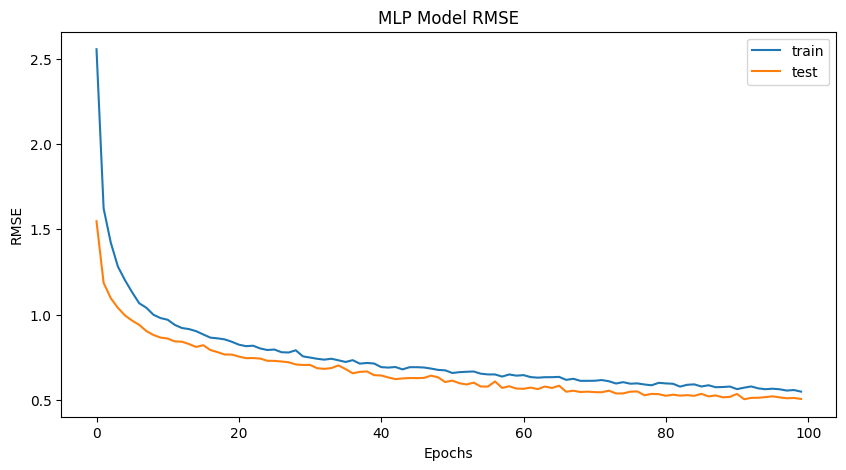

In [42]:
plt.figure(figsize=(10,5))
plt.plot(np.sqrt(mlp_his.history['loss']))
plt.plot(np.sqrt(mlp_his.history['val_loss']))
plt.legend(['train','test'])
plt.title('MLP Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epochs')
plt.show()

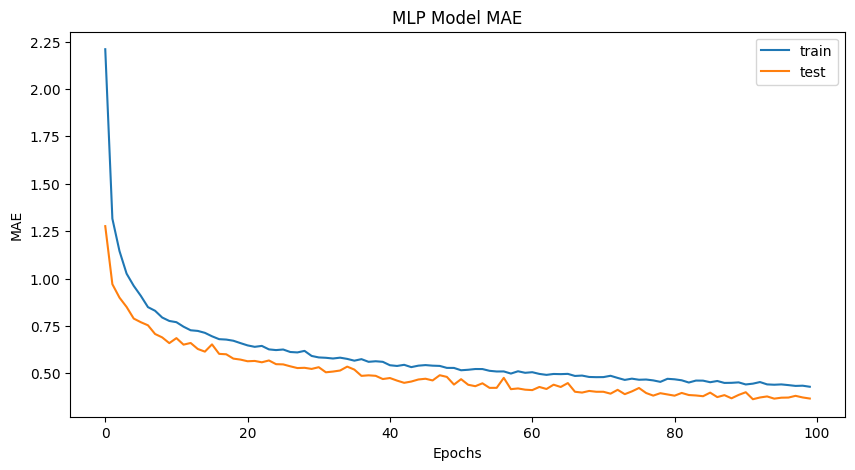

In [43]:
plt.figure(figsize=(10,5))
plt.plot(mlp_his.history['mean_absolute_error'])
plt.plot(mlp_his.history['val_mean_absolute_error'])
plt.legend(['train','test'])
plt.title('MLP Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epochs')
plt.show()

In [44]:
print('MAE for MLP:',mean_absolute_error(mlp_pred,y_test))
print('RMSE for MLP:',np.sqrt(mean_squared_error(mlp_pred,y_test)))
print('R-squared value for MLP:',r2_score(mlp_pred,y_test))

MAE for MLP: 0.2651006711409396
RMSE for MLP: 0.5464958537087041
R-squared value for MLP: 0.6599297167978319


## ANN Feed forward Algorithm

In [45]:
ff_model=Sequential()
ff_model.add(Dense(124,activation='relu',input_shape=(x_train.shape[1],)))
ff_model.add(Dense(64,activation='relu'))
ff_model.add(Flatten())
ff_model.add(Dense(64,activation='relu'))
ff_model.add(Flatten())
ff_model.add(Dense(64,activation='relu'))
ff_model.add(Dense(32,activation='relu'))
ff_model.add(Dropout(0.2))
ff_model.add(Dense(12, activation='linear'))
ff_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 124)               4588      
                                                                 
 dense_10 (Dense)            (None, 64)                8000      
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 32)               

In [46]:
ff_model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_absolute_error'])
ff_his=ff_model.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_test, y_test))
ff_pred=ff_model.predict(x_test)
ff_pred=np.round((np.clip(ff_pred,0,4))).astype(int)

Epoch 1/100
42/42 [==============================] - 2s 14ms/step - loss: 7.7733 - mean_absolute_error: 2.4203 - val_loss: 3.8572 - val_mean_absolute_error: 1.5325
Epoch 2/100
42/42 [==============================] - 0s 7ms/step - loss: 3.3192 - mean_absolute_error: 1.4577 - val_loss: 1.4202 - val_mean_absolute_error: 0.9772
Epoch 3/100
42/42 [==============================] - 0s 7ms/step - loss: 1.9554 - mean_absolute_error: 1.1227 - val_loss: 1.1237 - val_mean_absolute_error: 0.8350
Epoch 4/100
42/42 [==============================] - 0s 7ms/step - loss: 1.5466 - mean_absolute_error: 0.9958 - val_loss: 1.0214 - val_mean_absolute_error: 0.8022
Epoch 5/100
42/42 [==============================] - 0s 7ms/step - loss: 1.4110 - mean_absolute_error: 0.9434 - val_loss: 1.0234 - val_mean_absolute_error: 0.8348
Epoch 6/100
42/42 [==============================] - 0s 7ms/step - loss: 1.2535 - mean_absolute_error: 0.8910 - val_loss: 0.9072 - val_mean_absolute_error: 0.7463
Epoch 7/100
42/42 [==

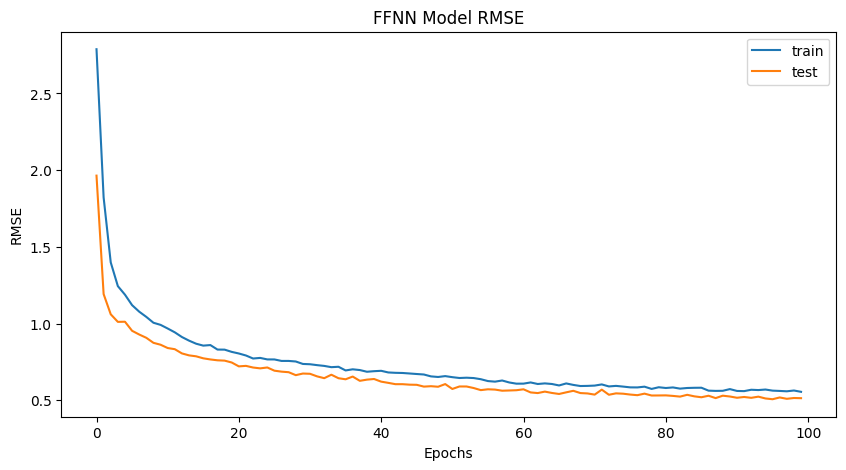

In [47]:
plt.figure(figsize=(10,5))
plt.plot(np.sqrt(ff_his.history['loss']))
plt.plot(np.sqrt(ff_his.history['val_loss']))
plt.legend(['train','test'])
plt.title('FFNN Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epochs')
plt.show()

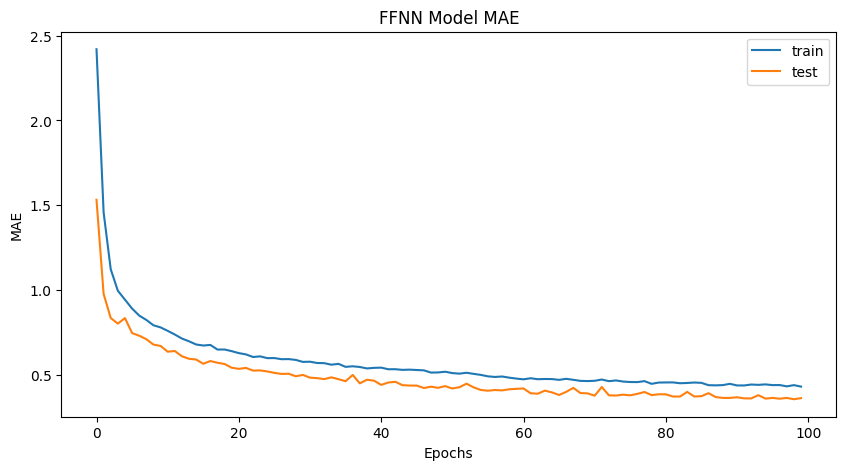

In [48]:
plt.figure(figsize=(10,5))
plt.plot(ff_his.history['mean_absolute_error'])
plt.plot(ff_his.history['val_mean_absolute_error'])
plt.legend(['train','test'])
plt.title('FFNN Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epochs')
plt.show()

In [49]:
print('MAE for FFNN:',mean_absolute_error(ff_pred,y_test))
print('RMSE for FFNN:',np.sqrt(mean_squared_error(ff_pred,y_test)))
print('R-squared value for FFNN:',r2_score(ff_pred,y_test))

MAE for FFNN: 0.2589485458612975
RMSE for FFNN: 0.5520958643210864
R-squared value for FFNN: 0.6622652573936337


In [50]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [51]:
x_train.shape

(1337, 36, 1)

## RNN Model

In [52]:
rnn_model=Sequential()
rnn_model.add(SimpleRNN(128,input_shape=(x_train.shape[1],x_train.shape[2])))
rnn_model.add(Dense(64,activation='relu'))
rnn_model.add(Flatten())
rnn_model.add(Dense(64,activation='relu'))
rnn_model.add(Flatten())
rnn_model.add(Dense(64,activation='relu'))
rnn_model.add(Dense(32,activation='relu'))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(12, activation='linear'))

In [53]:
rnn_model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_absolute_error'])
rnn_his=rnn_model.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_test, y_test))
rnn_pred=rnn_model.predict(x_test)
rnn_pred=np.round((np.clip(rnn_pred,0,4))).astype(int)

Epoch 1/100
42/42 [==============================] - 5s 41ms/step - loss: 4.3398 - mean_absolute_error: 1.6972 - val_loss: 1.3778 - val_mean_absolute_error: 0.9984
Epoch 2/100
42/42 [==============================] - 1s 26ms/step - loss: 2.0115 - mean_absolute_error: 1.1263 - val_loss: 1.1884 - val_mean_absolute_error: 0.8779
Epoch 3/100
42/42 [==============================] - 1s 31ms/step - loss: 1.7745 - mean_absolute_error: 1.0587 - val_loss: 1.1877 - val_mean_absolute_error: 0.8972
Epoch 4/100
42/42 [==============================] - 1s 27ms/step - loss: 1.6193 - mean_absolute_error: 1.0076 - val_loss: 1.1410 - val_mean_absolute_error: 0.8520
Epoch 5/100
42/42 [==============================] - 1s 28ms/step - loss: 1.4757 - mean_absolute_error: 0.9573 - val_loss: 1.1101 - val_mean_absolute_error: 0.8423
Epoch 6/100
42/42 [==============================] - 1s 24ms/step - loss: 1.4461 - mean_absolute_error: 0.9495 - val_loss: 1.0954 - val_mean_absolute_error: 0.7909
Epoch 7/100
42/4

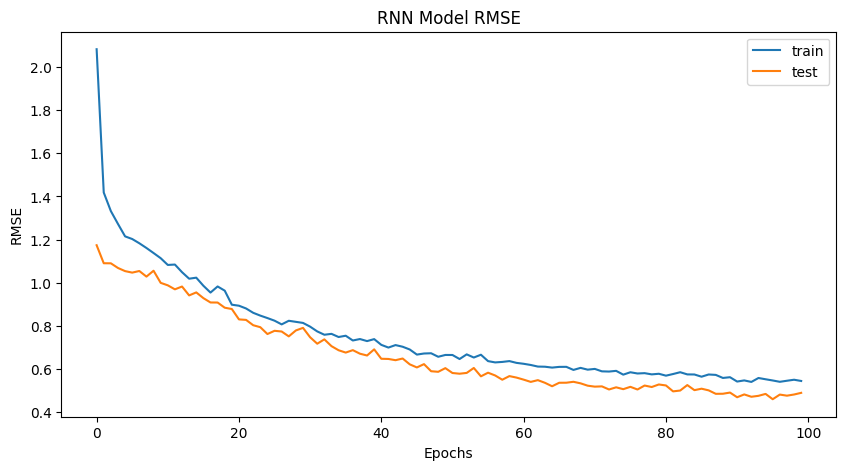

In [54]:
plt.figure(figsize=(10,5))
plt.plot(np.sqrt(rnn_his.history['loss']))
plt.plot(np.sqrt(rnn_his.history['val_loss']))
plt.legend(['train','test'])
plt.title('RNN Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epochs')
plt.show()

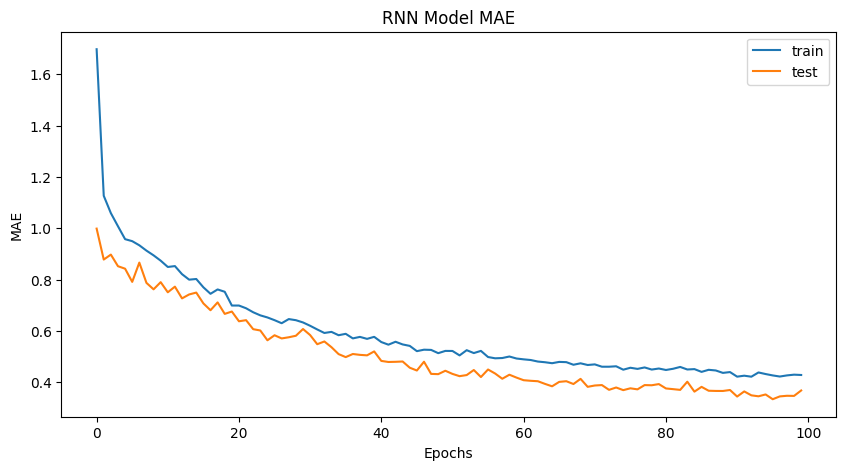

In [55]:
plt.figure(figsize=(10,5))
plt.plot(rnn_his.history['mean_absolute_error'])
plt.plot(rnn_his.history['val_mean_absolute_error'])
plt.legend(['train','test'])
plt.title('RNN Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epochs')
plt.show()

In [56]:
print('MAE for RNN:',mean_absolute_error(rnn_pred,y_test))
print('RMSE for RNN:',np.sqrt(mean_squared_error(rnn_pred,y_test)))
print('R-squared value for RNN:',r2_score(rnn_pred,y_test))

MAE for RNN: 0.267897091722595
RMSE for RNN: 0.5439313353164624
R-squared value for RNN: 0.6676457986627594


## LSTM Model

In [57]:
lstm_model=Sequential()
lstm_model.add(LSTM(128,input_shape=(x_train.shape[1],x_train.shape[2])))
lstm_model.add(Dense(64,activation='relu'))
lstm_model.add(Flatten())
lstm_model.add(Dense(64,activation='relu'))
lstm_model.add(Flatten())
lstm_model.add(Dense(64,activation='relu'))
lstm_model.add(Dense(32,activation='relu'))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(12, activation='linear'))

In [58]:
lstm_model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_absolute_error'])
lstm_his=lstm_model.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_test, y_test))
lstm_pred=lstm_model.predict(x_test)
lstm_pred=np.round((np.clip(lstm_pred,0,4))).astype(int)

Epoch 1/100
42/42 [==============================] - 9s 87ms/step - loss: 7.1581 - mean_absolute_error: 2.3013 - val_loss: 2.3055 - val_mean_absolute_error: 1.3060
Epoch 2/100
42/42 [==============================] - 2s 57ms/step - loss: 2.9479 - mean_absolute_error: 1.3587 - val_loss: 1.3537 - val_mean_absolute_error: 0.9657
Epoch 3/100
42/42 [==============================] - 2s 40ms/step - loss: 2.2250 - mean_absolute_error: 1.1828 - val_loss: 1.2516 - val_mean_absolute_error: 0.9013
Epoch 4/100
42/42 [==============================] - 3s 64ms/step - loss: 2.0257 - mean_absolute_error: 1.1258 - val_loss: 1.2669 - val_mean_absolute_error: 0.9436
Epoch 5/100
42/42 [==============================] - 3s 67ms/step - loss: 1.8715 - mean_absolute_error: 1.0805 - val_loss: 1.2266 - val_mean_absolute_error: 0.9152
Epoch 6/100
42/42 [==============================] - 3s 75ms/step - loss: 1.7518 - mean_absolute_error: 1.0407 - val_loss: 1.2811 - val_mean_absolute_error: 0.9555
Epoch 7/100
42/4

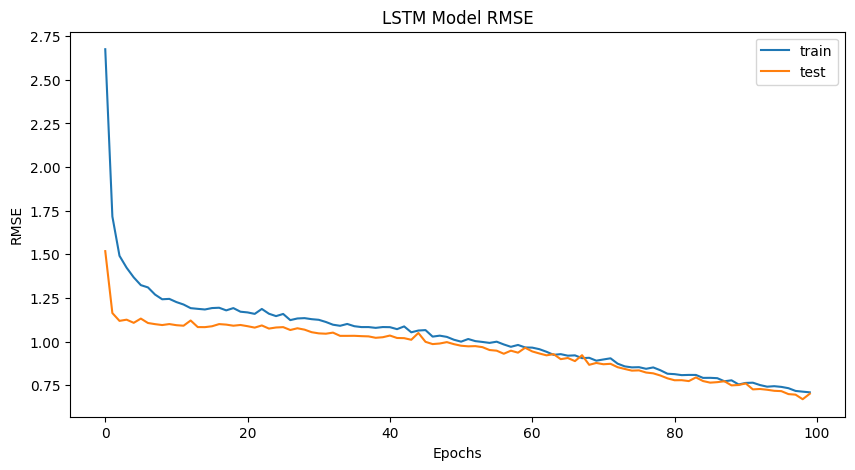

In [59]:
plt.figure(figsize=(10,5))
plt.plot(np.sqrt(lstm_his.history['loss']))
plt.plot(np.sqrt(lstm_his.history['val_loss']))
plt.legend(['train','test'])
plt.title('LSTM Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epochs')
plt.show()

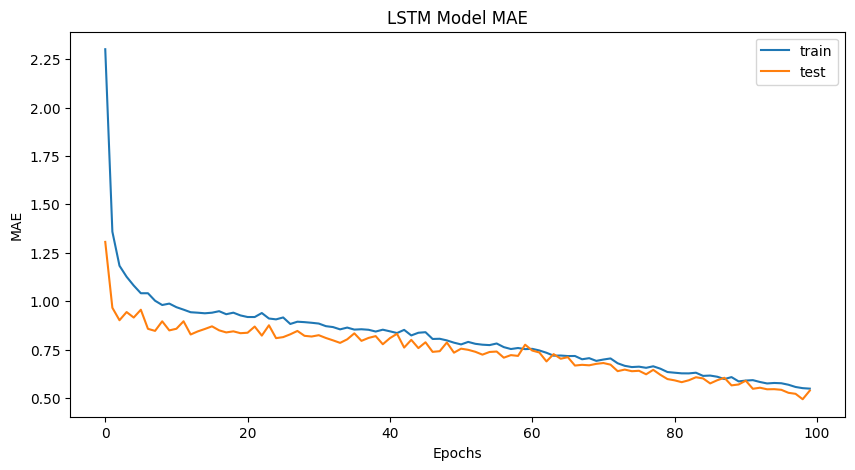

In [60]:
plt.figure(figsize=(10,5))
plt.plot(lstm_his.history['mean_absolute_error'])
plt.plot(lstm_his.history['val_mean_absolute_error'])
plt.legend(['train','test'])
plt.title('LSTM Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epochs')
plt.show()

In [61]:
print('MAE for LSTM:',mean_absolute_error(lstm_pred,y_test))
print('RMSE for LSTM:',np.sqrt(mean_squared_error(lstm_pred,y_test)))
print('R-squared value for LSTM:',r2_score(lstm_pred,y_test))

MAE for LSTM: 0.47427293064876963
RMSE for LSTM: 0.7486004839457148
R-squared value for LSTM: 0.13707934079805423


In [62]:
model_names=['MLP','FFNN','RNN','LSTM']
mae_values=[mean_absolute_error(mlp_pred,y_test),mean_absolute_error(ff_pred,y_test),mean_absolute_error(rnn_pred,y_test),mean_absolute_error(lstm_pred,y_test)]
rmse_values=[np.sqrt(mean_squared_error(mlp_pred,y_test)),np.sqrt(mean_squared_error(ff_pred,y_test)),np.sqrt(mean_squared_error(rnn_pred,y_test)),np.sqrt(mean_squared_error(lstm_pred,y_test))]
r2_values=[r2_score(mlp_pred,y_test),r2_score(ff_pred,y_test),r2_score(rnn_pred,y_test),r2_score(lstm_pred,y_test)]
model_scores=pd.DataFrame()
model_scores['Model']=model_names
model_scores['MAE']=mae_values
model_scores['RMSE']=rmse_values
model_scores['R2 score']=r2_values
model_scores

,Model,MAE,RMSE,R2 score
0,MLP,0.265101,0.546496,0.659930
1,FFNN,0.258949,0.552096,0.662265
2,RNN,0.267897,0.543931,0.667646
3,LSTM,0.474273,0.748600,0.137079
